In [46]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy.signal import convolve2d
from math import sqrt
import time
import cv2

In [47]:
def plot(img, nx, ny):
    img = np.array(img)
    
    img_fft = np.fft.fft2(img)
    img_fft_shift = np.fft.fftshift(img_fft)
    magnitude_spectrum = 20*np.log(1+np.abs(img_fft_shift))
    
    figure = plt.figure(figsize=[10,10])
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title('Image'),plt.axis('off')
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum '+str(nx)+' '+str(ny)),plt.axis('off')
    plt.show()
    
def sample_image(img, nx, ny):
    img = np.array(img)
    return img[0::nx, 0::ny]


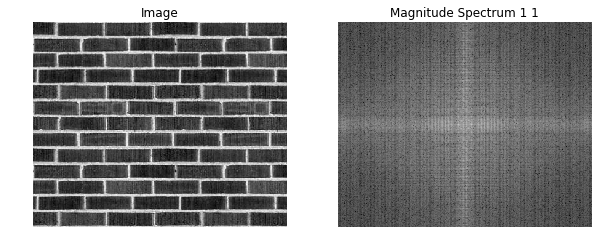

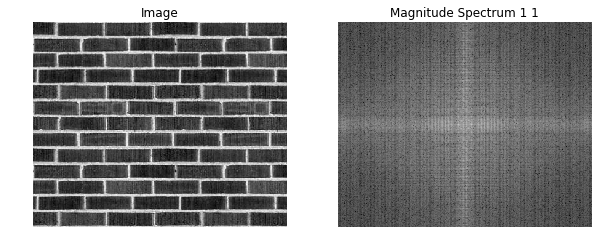

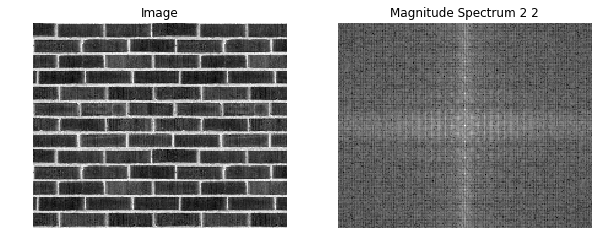

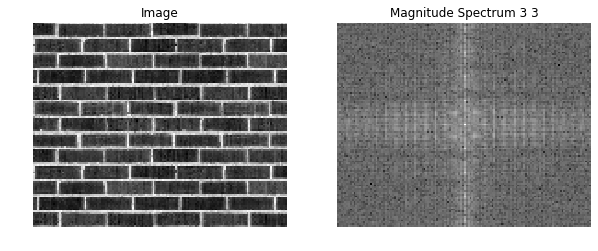

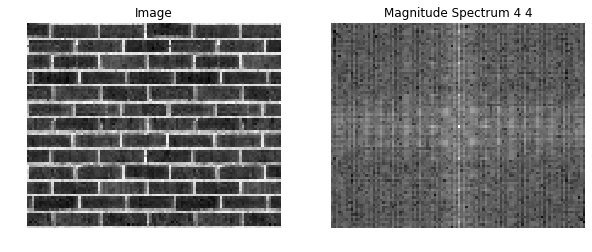

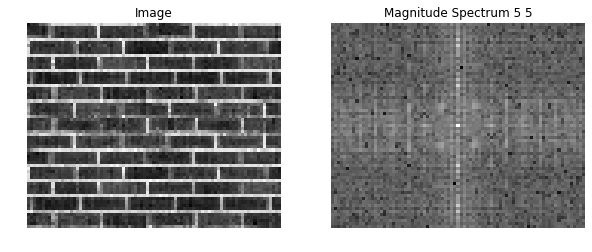

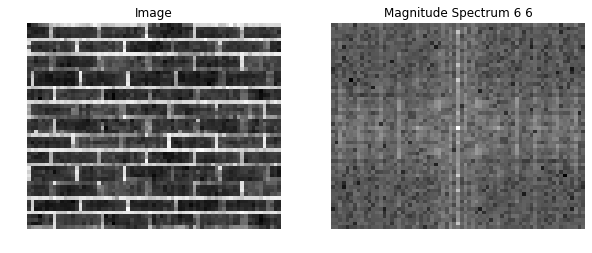

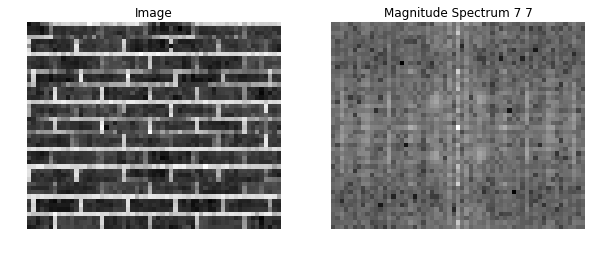

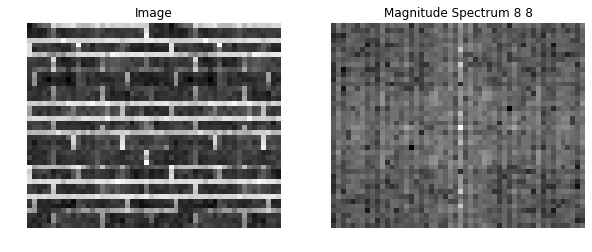

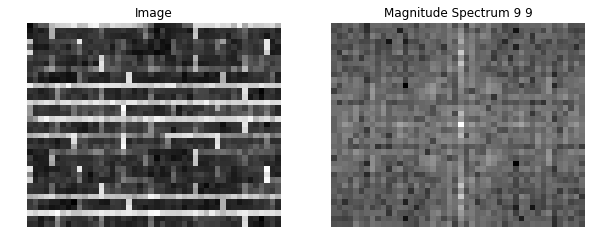

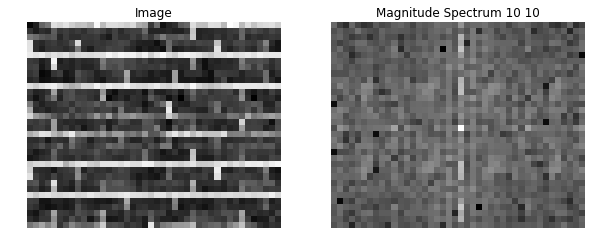

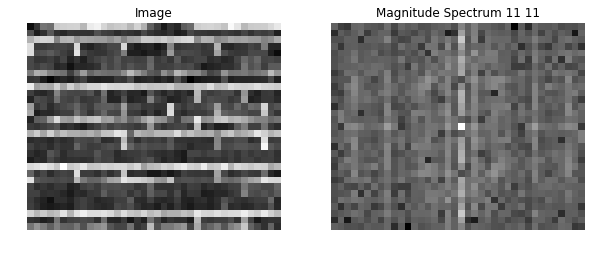

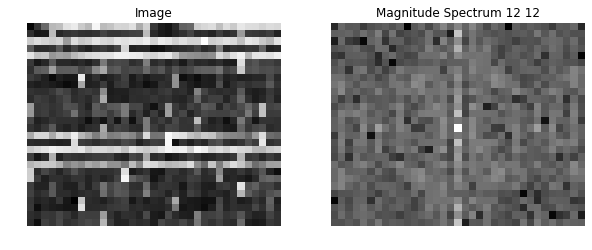

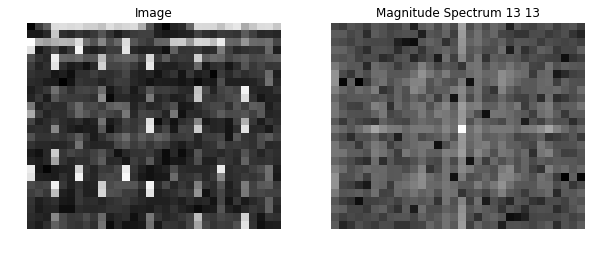

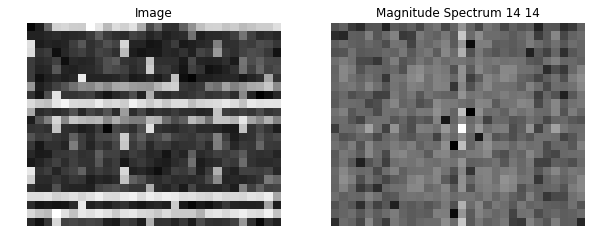

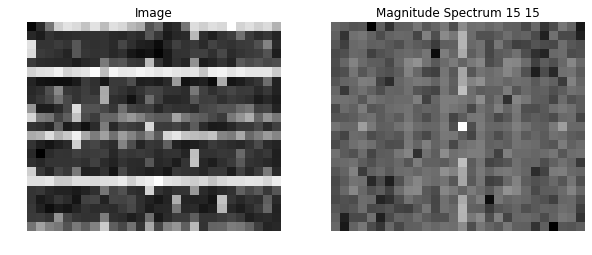

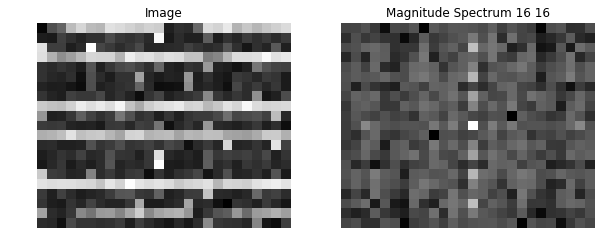

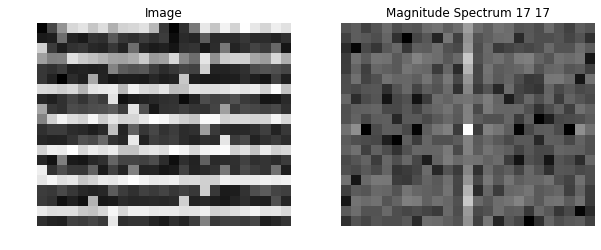

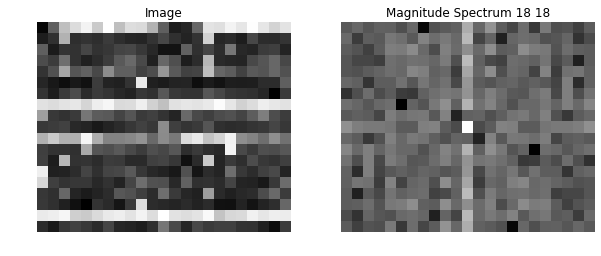

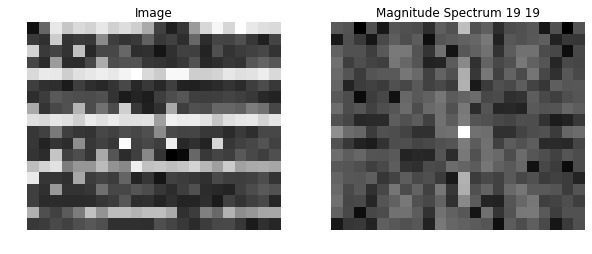

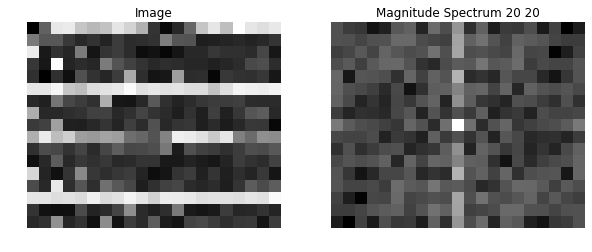

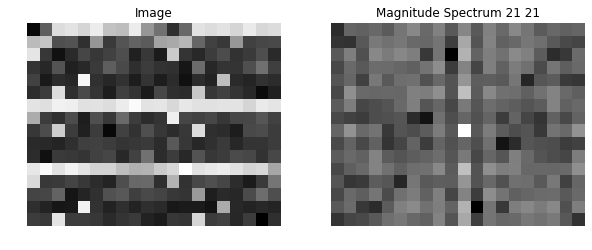

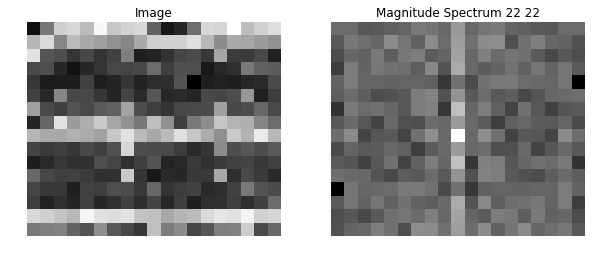

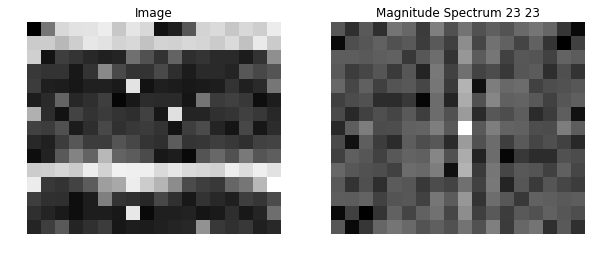

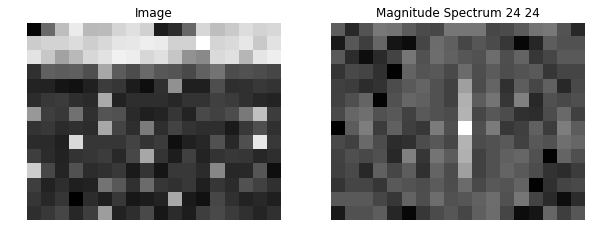

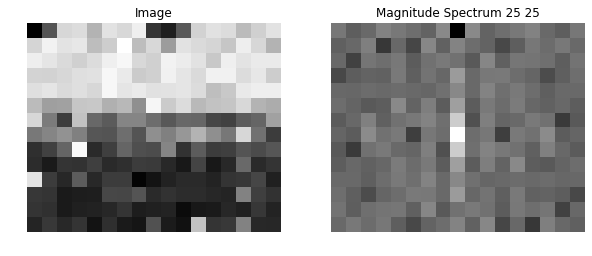

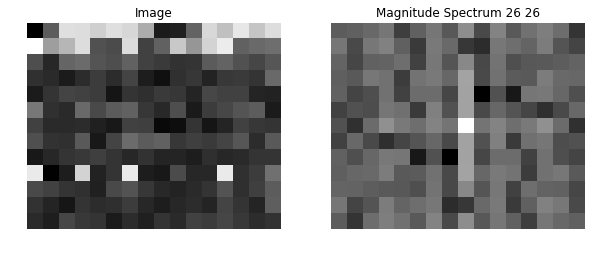

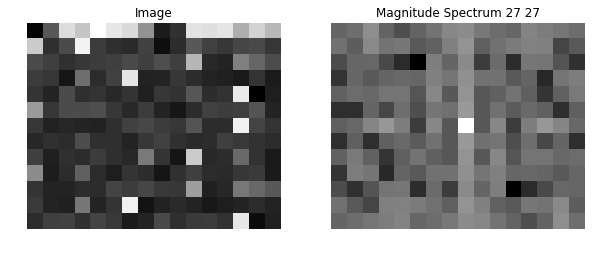

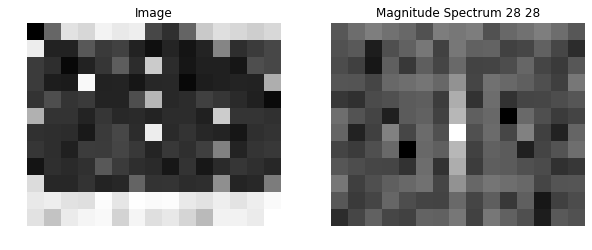

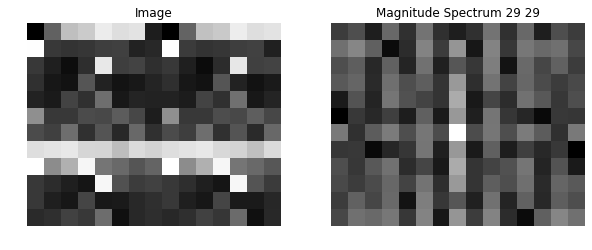

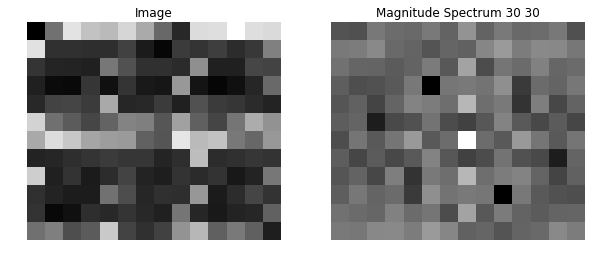

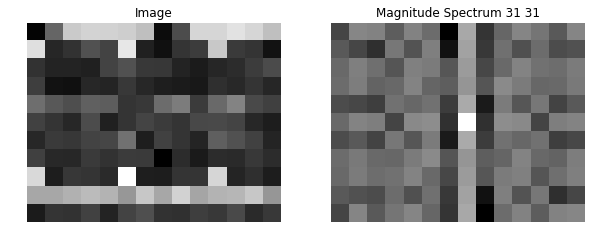

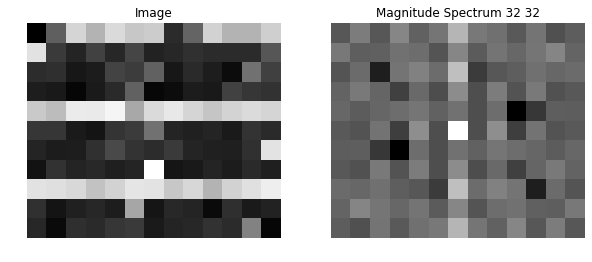

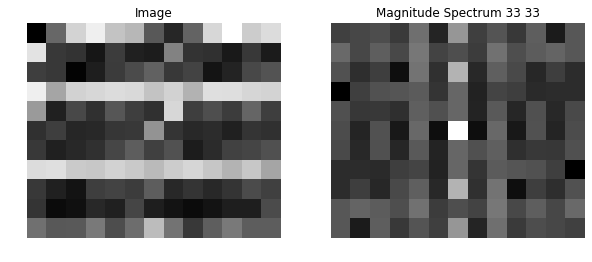

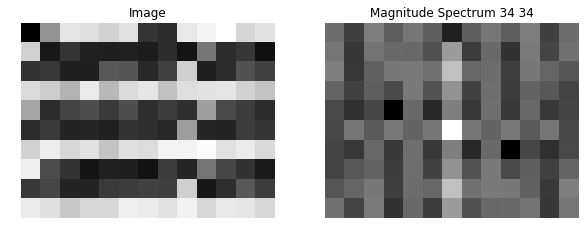

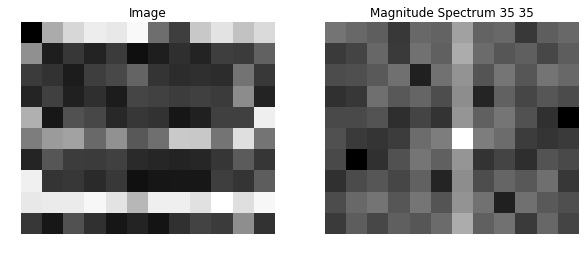

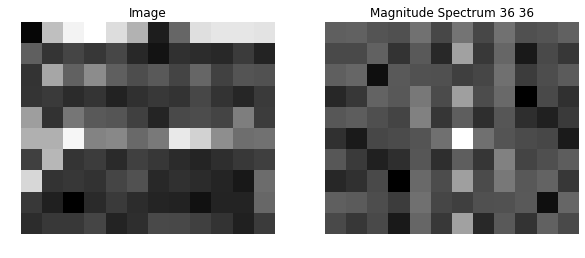

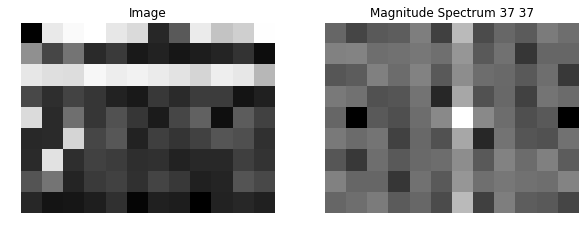

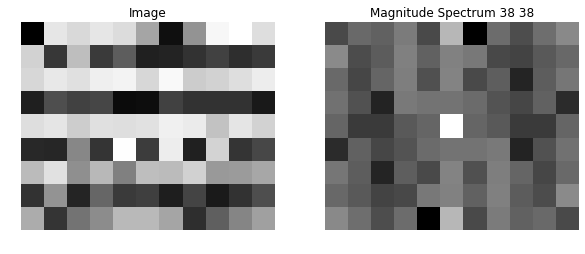

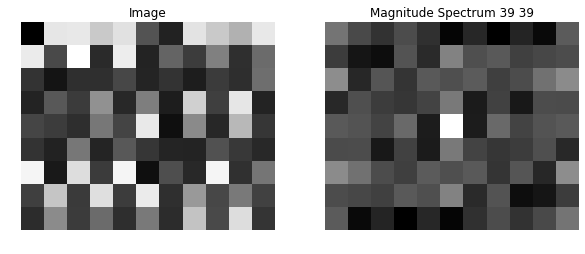

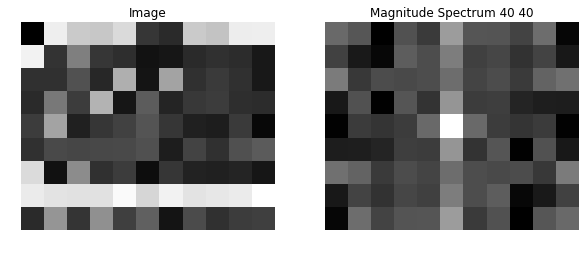

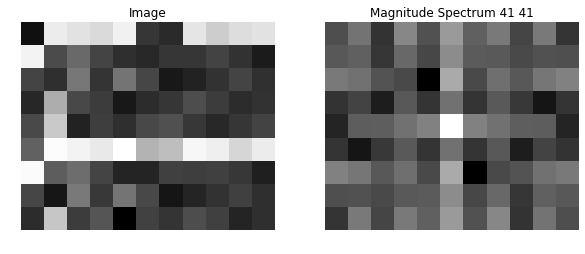

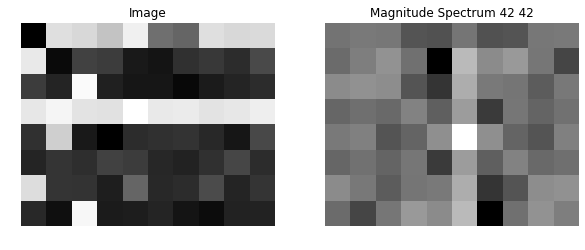

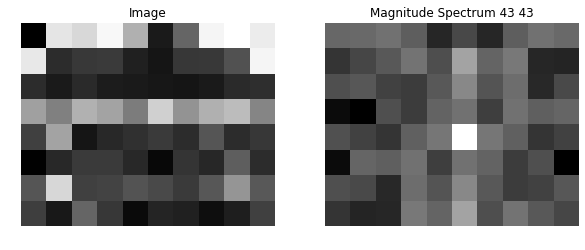

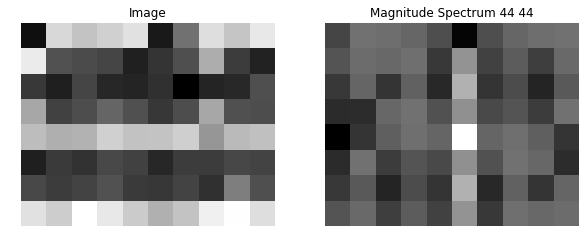

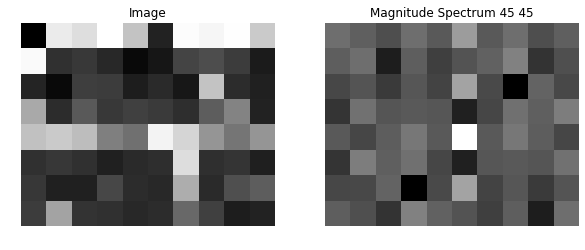

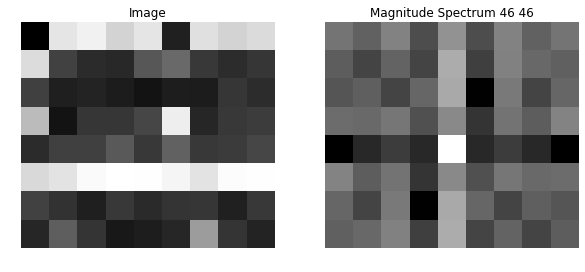

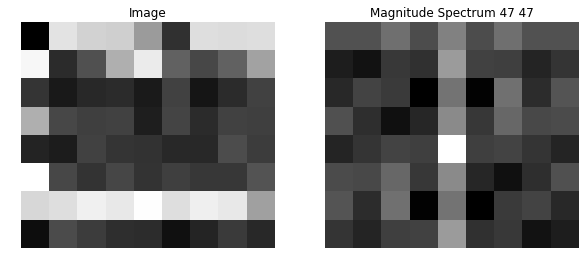

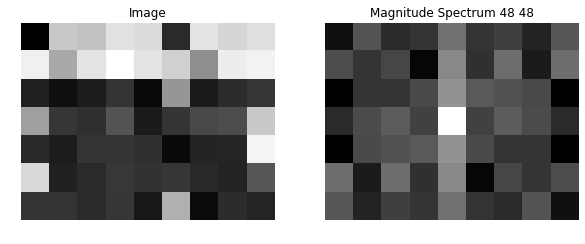

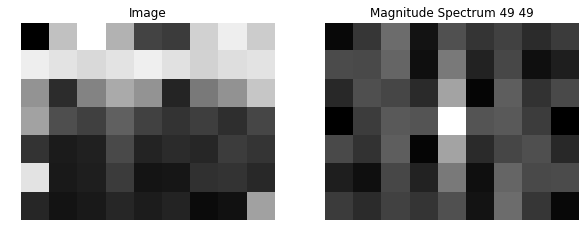

In [48]:
img = Image.open('../input_data/bricks.jpg').convert('L')
plot(img,1 ,1)
for i in range(1,50):
    sampled_img = sample_image(img, i, i)
    plot(sampled_img, i, i)

<b>The nyquist rate for the image is 4.<br> As the magnitude spectrum repeats some part of it starting from 5 and also we cannot recover the image after the transformation.</b>

In [49]:
def make_filt(img):
    filt = np.zeros(img.shape)
    filt = filt.astype('float')
    for u in range(img.shape[0]):
        for v in range(img.shape[1]):
            filt[u][v] = sqrt((u-((img.shape[0])/2))**2 + (v-((img.shape[1])/2))**2)
#     print(filt)
    return filt

def take_mult(img, filt):
    img = np.array(img)
    img = img.astype('float')
    fft_img = np.fft.fft2(img)
    fft_img_shift = np.fft.fftshift(fft_img)
    
    magnitude_spectrum = 20*np.log(1+np.abs(fft_img_shift))
#     fft_img_shift[h_rows -10:h_rows +10, h_cols -10:h_cols +10] = 0

    new_img = np.multiply(fft_img_shift, filt)
    magnitude_spectrum2 = 20*np.log(1+np.abs(new_img))

#   Making Image Back to Spatial Domain
    new_img_ifft = np.fft.ifftshift(new_img)
    img_back = np.fft.ifft2(new_img_ifft)
    img_back = np.abs(img_back)
    img_back = img_back.astype('uint8')
    
    figure = plt.figure(figsize=[10,10])
    plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Input Image'),plt.axis('off')
    plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
    plt.title('After Transform'),plt.axis('off')
    plt.show()
    
    return img_back

def gaussianLOWPASS(img, d0):
    img = np.array(img)
    temp = make_filt(img)
    filt = np.zeros(img.shape)
    filt = np.exp(-(np.square(temp))/(2*d0*d0))
    
    return take_mult(img, filt)

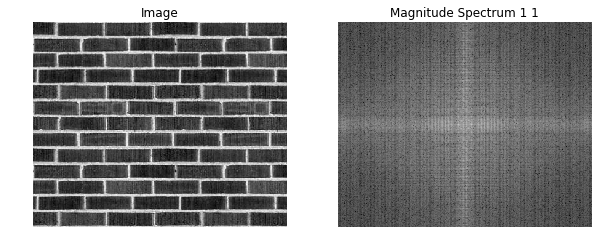

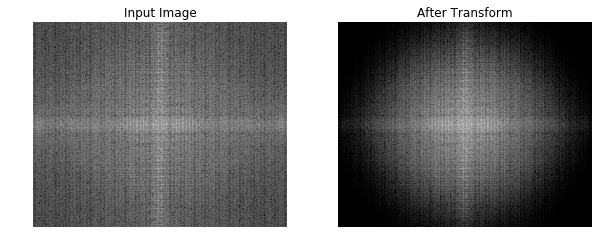

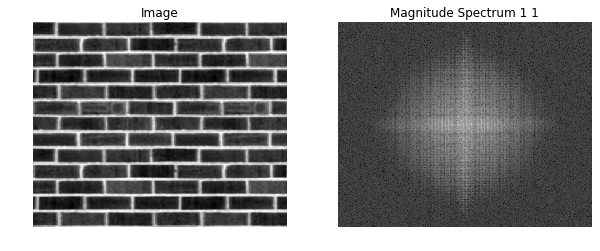

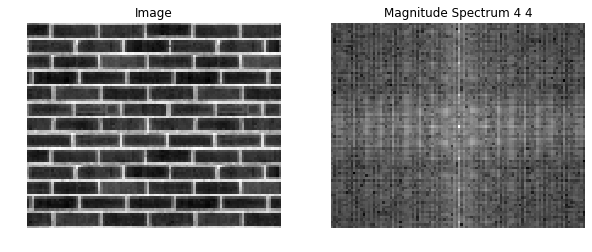

In [50]:
img = Image.open('../input_data/bricks.jpg').convert('L')
plot(img, 1, 1)
gauss_img = gaussianLOWPASS(img, 50)
plot(gauss_img, 1, 1)
gauss_sampled_img1 = sample_image(gauss_img, 4, 4)
plot(gauss_sampled_img1, 4, 4)